In [2]:
from music21 import *

In [24]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt

In [60]:
import numpy as np

In [104]:
#fp='corpus/kernfiles/fimaris.krn' 
fp='corpus/kernfiles/brahms_op39-02_edited.krn'

In [105]:
s = converter.parse(fp)

In [106]:
sFlat=s.flat

In [107]:
minutes=round(sFlat.seconds/60,2)
minutes

0.46

In [108]:
#measures
len(s.parts[0])

31

In [109]:
#parts
len(s.parts)

3

In [117]:
p_accidentals_list=[]
partRange_list=[]
duration_list=[]
for part in s.parts:
    acc=0
    notes=0
    partRange=part.analyze('ambitus').semitones
    partRange_list.append(partRange)
    for n in part.recurse().getElementsByClass('Note'):
        #print(n.pitch)
        #print(n.pitch.accidental)
        if n.pitch.accidental is None:
            acc+=0
        else: 
            acc+=1
        notes+=1
        #print(notes)
        #print(acc)
        duration_list.append(n.duration.quarterLength)
    if notes>0:
        p_accidentals_list.append(round(acc/notes,2))
print(p_accidentals_list)
max_p_accidentals=max(p_accidentals_list)
max_partRange=max(partRange_list)
print(max_p_accidentals)
print(partRange_list)
print(max_partRange)
print(duration_list)

[0.33, 0.58]
0.58
[27, 19, 31]
31
[3.0, 1.5, 0.5, 1.0, 1.5, 0.5, 1.0, 1.5, 0.5, 1.0, 1.5, 0.5, 1.0, 0.5, 0.5, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0]


In [38]:
notes

18

In [11]:
fe = features.jSymbolic.RangeFeature(s)
fe.extract().vector

[16]

In [12]:
stdRange=features.jSymbolic.VoiceEqualityRangeFeature(s)
stdRange.extract().vector

[0]

In [18]:
minDur=features.jSymbolic.MinimumNoteDurationFeature(s)
minDur.extract().vector

[0.1875]

In [41]:
durationSeries = pd.Series(durationList)

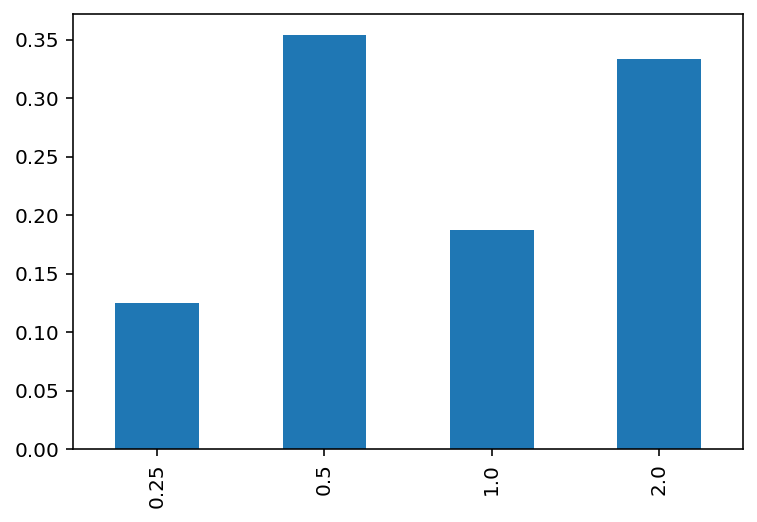

In [58]:
durationSeries.value_counts(normalize=True).sort_index(0).plot(kind='bar')

In [61]:
vals, counts = np.unique(durationSeries, return_counts=True)
print(vals, counts)

[0.25 0.5  1.   2.  ] [ 6 17  9 16]


In [98]:
np.argmin(vals)

0

In [102]:
p_shortestDuration = counts[np.argmin(vals)]/sum(counts)
print (p_shortestDuration)

0.125
